Bagian 1: Pengumpulan dan Prepocessing Data

#Load Package

In [3]:
# load libraries
import os
import numpy as np
import cv2
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Input,Lambda
from keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

c:\Users\Safira\anaconda3\Lib\site-packages\h5py\__init__.py:36: UserWarning: h5py is running against HDF5 1.14.6 when it was built against 1.14.5, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "


#Load Dataset

In [4]:
dir = "C:\\KULIAH\\AI\\tumor"
dir_train = "C:\\KULIAH\\AI\\tumor\\Training"
dir_valid = "C:\\KULIAH\\AI\\tumor\\Testing"


PREPOCESSING DATA

In [9]:
img_shape = (224, 224, 3)
class_count = 3

In [10]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.2,
    rotation_range=15,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)

In [11]:
train_generator = train_datagen.flow_from_directory(
    dir_train,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    dir_valid,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical'
)

Found 4255 images belonging to 3 classes.
Found 1011 images belonging to 3 classes.


Bagian 2: Perancangan Model

Model CNN

In [ ]:
model = Sequential([
    Input(shape=img_shape),
    
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),

    Dense(class_count, activation='softmax')  # Output layer
])

# Kompilasi model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Tampilkan ringkasan model
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,347 (42.61 MB)

 Trainable params: 11,169,347 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

OPTIMIZE TRAINING 

In [15]:
history = model.fit(
    train_generator,
    epochs=15,
    validation_data=val_generator,
    callbacks=[]
)

c:\Users\Safira\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
266/266 ━━━━━━━━━━━━━━━━━━━━ 190s 697ms/step - accuracy: 0.5825 - loss: 0.8286 - val_accuracy: 0.7211 - val_loss: 0.8425
Epoch 2/15
266/266 ━━━━━━━━━━━━━━━━━━━━ 159s 597ms/step - accuracy: 0.7685 - loss: 0.5422 - val_accuracy: 0.7567 - val_loss: 0.6386
Epoch 3/15
266/266 ━━━━━━━━━━━━━━━━━━━━ 238s 894ms/step - accuracy: 0.8094 - loss: 0.4507 - val_accuracy: 0.7794 - val_loss: 0.5281
Epoch 4/15
266/266 ━━━━━━━━━━━━━━━━━━━━ 172s 646ms/step - accuracy: 0.8451 - loss: 0.4049 - val_accuracy: 0.8051 - val_loss: 0.4155
Epoch 5/15
266/266 ━━━━━━━━━━━━━━━━━━━━ 193s 725ms/step - accuracy: 0.8352 - loss: 0.3901 - val_accuracy: 0.8180 - val_loss: 0.4290
Epoch 6/15
266/266 ━━━━━━━━━━━━━━━━━━━━ 188s 705ms/step - accuracy: 0.8618 - loss: 0.3336 - val_accuracy: 0.8467 - val_loss: 0.3726
Epoch 7/15
266/266 ━━━━━━━━━━━━━━━━━━━━ 176s 660ms/step - accuracy: 0.8773 - loss: 0.3086 - val_accuracy: 0.8556 - val_loss: 0.3233
Epoch 8/15
266/266 ━━━━━━━━━━━━━━━━━━━━ 252s 950ms/step - accuracy: 0.8851 -

ResourceExhaustedError: Graph execution error:

Detected at node PyFunc defined at (most recent call last):
<stack traces unavailable>
MemoryError: Unable to allocate 9.19 MiB for an array with shape (16, 224, 224, 3) and data type float32
Traceback (most recent call last):

  File "c:\Users\Safira\anaconda3\Lib\site-packages\tensorflow\python\ops\script_ops.py", line 269, in __call__
    ret = func(*args)
          ^^^^^^^^^^^

  File "c:\Users\Safira\anaconda3\Lib\site-packages\tensorflow\python\autograph\impl\api.py", line 643, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^

  File "c:\Users\Safira\anaconda3\Lib\site-packages\tensorflow\python\data\ops\from_generator_op.py", line 198, in generator_py_func
    values = next(generator_state.get_iterator(iterator_id))
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

  File "c:\Users\Safira\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py", line 248, in _finite_generator
    yield self._standardize_batch(self.py_dataset[i])
                                  ~~~~~~~~~~~~~~~^^^

  File "c:\Users\Safira\anaconda3\Lib\site-packages\keras\src\legacy\preprocessing\image.py", line 68, in __getitem__
    return self._get_batches_of_transformed_samples(index_array)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

  File "c:\Users\Safira\anaconda3\Lib\site-packages\keras\src\legacy\preprocessing\image.py", line 306, in _get_batches_of_transformed_samples
    batch_x = np.zeros(
              ^^^^^^^^^

numpy.core._exceptions._ArrayMemoryError: Unable to allocate 9.19 MiB for an array with shape (16, 224, 224, 3) and data type float32


	 [[{{node PyFunc}}]]
	 [[IteratorGetNext]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_multi_step_on_iterator_2254]

PLOT

In [13]:
# Plot Training & Validation Accuracy
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.legend()
plt.title('CNN Training vs Validation Accuracy')
plt.show()

NameError: name 'history' is not defined

PREDICT NEW DATA

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


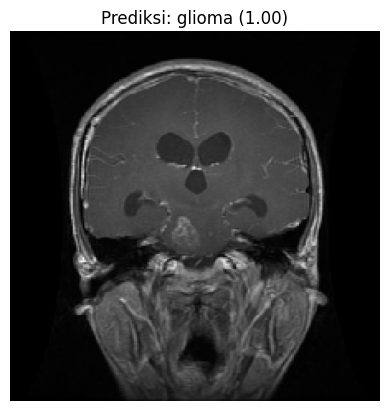

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


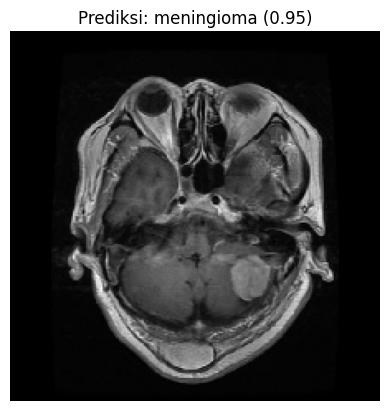

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


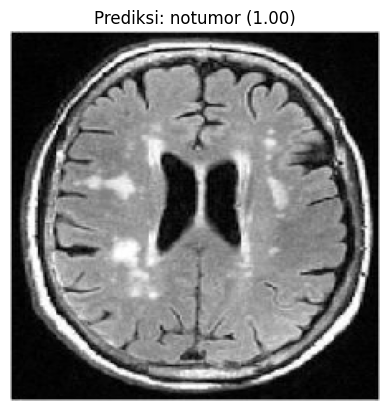

In [61]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Daftar kelas (urutan sama seperti pada training)
class_names = ['glioma', 'meningioma', 'notumor']

def predict_custom_image(image_path):
    # Load dan ubah ukuran gambar sesuai input model
    img = load_img(image_path, target_size=(224, 224))
    img_array = img_to_array(img) / 255.0  # Normalisasi
    img_array = np.expand_dims(img_array, axis=0)  # Tambahkan batch dimension

    # Prediksi
    prediction = model.predict(img_array)
    predicted_class_index = np.argmax(prediction)
    predicted_class_name = class_names[predicted_class_index]
    confidence = prediction[0][predicted_class_index]

    # Tampilkan hasil
    plt.imshow(img)
    plt.title(f"Prediksi: {predicted_class_name} ({confidence:.2f})")
    plt.axis('off')
    plt.show()

predict_custom_image("C:\\KULIAH\\AI\\tumor\\glioma3.jpg")
predict_custom_image("C:\\KULIAH\\AI\\tumor\\meningioma2.jpg")
predict_custom_image("C:\\KULIAH\\AI\\tumor\\notumor.jpg")